<h1 style="font-family:verdana;"><center>How to not flatten the curve 📈</center></h1>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
    <b>This notebook was created at the time, Covid cases were on a great rise in USA.</b><br>
    The graph of total active cases in The United States has decided to go up. In this short notebook, we will perform EDA on Coronavirus cases in USA. I do not want to hurt anyone's emotion with this notebook. This notebook is just for exploration of data.<br><br>
    A lot of countries has recovered to a great extent from the grasp of Coronavirus but the number of cases in USA is catching a boost? Lets find out.
</p>

***

[![forthebadge](https://forthebadge.com/images/badges/built-with-love.svg)](https://forthebadge.com)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import rcParams
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import datetime as dt
import folium
from folium.plugins import MarkerCluster
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

***

<h1 id="basics" style="font-family:verdana;"> 
    <center>Just Speculating 🔬
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#basics" target="_top">¶</a>
    </center>
</h1>

In [ ]:
data = pd.read_csv("../input/corona-virus-report/covid_19_clean_complete.csv")
usa = pd.read_csv('../input/covid19-in-usa/us_covid19_daily.csv')

In [ ]:
usa.head(3)

In [ ]:
data.head(3)

In [ ]:
data = data.rename(columns={'Country/Region':'Country'})

In [ ]:
data.isnull().sum()

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
    As we can see that the 'Province/State' column in our data is worthless because it is belongs to the missing value party and we do not promote such kind of environment here in our clean neighbourhood. So god help us, we will throw it out of the window.
</p>

In [ ]:
del data['Province/State']

In [ ]:
data.shape

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Great, now after taking care of this situation we can finally move forward from bronze age to the age of industrialization</p>

In [ ]:
usa.shape

In [ ]:
usa.columns

In [ ]:
data.columns

In [ ]:
usa.info()

In [ ]:
data.info()

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Hmmm, something is odd here. Look closely, we have a column containing 'Dates' but its datatype is object? This column has been drinking too much!! Lets teach this column some manners to convert it to datetime format. Same goes with the 'usa' data.</p>

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
usa['date'] = pd.to_datetime(usa['date'], format="%Y%m%d", errors='ignore')

In [ ]:
# data_us = data[data['Country'] == 'US']
data_aus = data[data['Country'] == 'Australia']
data_china = data[data['Country'] == 'China']
data_italy = data[data['Country'] == 'Italy']
data_jp = data[data['Country'] == 'Japan']
data_swiss = data[data['Country'] == 'Switzerland']

<h1 id="us" style="font-family:verdana;">
    United States
    <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#us" target="_top">¶</a>
</h1>

In [ ]:
usa[['date', 'positive']].iplot(kind='bar',
                                x='date',
                                y='positive',
                                color='blue',
                                gridcolor='white',
                                linecolor='black',
                                theme='pearl',
                                title='Confirmed Caess in USA',
                                yTitle='Count',
                                bargap=0.4,
                                opacity=0.7,
                                xTitle='Progression over Time')

In [ ]:
usa[['date', 'positive']].iplot(kind='line',
                                x='date',
                                y='positive',
                                color='blue',
                                gridcolor='white',
                                linecolor='black',
                                theme='pearl',
                                title='Confirmed Caess in USA',
                                yTitle='Count',
                                bargap=0.4,
                                opacity=0.7,
                                xTitle='Progression over Time')

In [ ]:
usa['active'] = usa['positive'] - (usa['death'] + usa['recovered'])

In [ ]:
usa[['date', 'active']].iplot(kind='bar',
                                x='date',
                                y='active',
                                color='green',
                                gridcolor='white',
                                linecolor='black',
                                theme='pearl',
                                title='Active Cases in United States',
                                yTitle='Count',
                                bargap=0.4,
                                opacity=0.7,
                                xTitle='Progression over Time')

In [ ]:
usa[['date', 'active']].iplot(kind='line',
                                x='date',
                                y='active',
                                color='green',
                                gridcolor='white',
                                linecolor='black',
                                theme='pearl',
                                title='Active Cases in United States',
                                yTitle='Count',
                                bargap=0.4,
                                opacity=0.7,
                                xTitle='Progression over Time')

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Well, now you see it!! Things were going somewhat good around the end of May but all hell broke loose starting June. Active cases rocketed directly into the sky.</p>

In [ ]:
usa[['date', 'death']].iplot(kind='bar',
                                  x='date',
                                  y='death',
                                color='red',
                                gridcolor='white',
                                linecolor='black',
                                theme='pearl',
                                title='Deaths in USA',
                                yTitle='Count',
                                bargap=0.4,
                                opacity=0.7,
                                xTitle='Progression over Time')

In [ ]:
usa[['date', 'death']].iplot(kind='line',
                                  x='date',
                                  y='death',
                                color='red',
                                gridcolor='white',
                                linecolor='black',
                                theme='pearl',
                                title='Deaths in USA',
                                yTitle='Count',
                                bargap=0.4,
                                opacity=0.7,
                                xTitle='Progression over Time')

<h1 id="italy" style="font-family:verdana;">
    Italy
    <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#italy" target="_top">¶</a>
</h1>

In [ ]:
data_italy[['Date', 'Active']].iplot(kind='bar',
                                     x='Date',
                                     y='Active',
                                    color='green',
                                    gridcolor='white',
                                    linecolor='black',
                                    theme='pearl',
                                    title='Active Cases in Italy',
                                    yTitle='Count',
                                    bargap=0.4,
                                    opacity=0.7,
                                    xTitle='Progression over Time')

In [ ]:
data_italy[['Date', 'Active']].iplot(kind='line',
                                     x='Date',
                                     y='Active',
                                    color='green',
                                    gridcolor='white',
                                    linecolor='black',
                                    theme='pearl',
                                    title='Active Cases in Italy',
                                    yTitle='Count',
                                    bargap=0.4,
                                    opacity=0.7,
                                    xTitle='Progression over Time')

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
    As we can see, Italy did a remarkable job. Hats off 🎓
</p>

In [ ]:
data_italy[['Date', 'Deaths']].iplot(kind='bar',
                                     x='Date',
                                     y='Deaths',
                                    color='red',
                                    gridcolor='white',
                                    linecolor='black',
                                    theme='pearl',
                                    title='Deaths in Italy',
                                    yTitle='Count',
                                    bargap=0.4,
                                    opacity=0.7,
                                    xTitle='Progression over Time')

In [ ]:
data_italy[['Date', 'Deaths']].iplot(kind='line',
                                     x='Date',
                                     y='Deaths',
                                    color='red',
                                    gridcolor='white',
                                    linecolor='black',
                                    theme='pearl',
                                    title='Deaths in Italy',
                                    yTitle='Count',
                                    bargap=0.4,
                                    opacity=0.7,
                                    xTitle='Progression over Time')

<h1 id="japan" style="font-family:verdana;">
    Japan
    <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#japan" target="_top">¶</a>
</h1>

In [ ]:
data_jp[['Date', 'Active']].iplot(kind='bar',
                                  x='Date',
                                  y='Active',
                                color='green',
                                gridcolor='white',
                                linecolor='black',
                                theme='pearl',
                                title='Active Cases in Japan',
                                yTitle='Count',
                                bargap=0.4,
                                opacity=0.7,
                                xTitle='Progression over Time')

In [ ]:
data_jp[['Date', 'Active']].iplot(kind='line',
                                x='Date',
                                y='Active',
                                color='green',
                                gridcolor='white',
                                linecolor='black',
                                theme='pearl',
                                title='Active Cases in Japan',
                                yTitle='Count',
                                bargap=0.4,
                                opacity=0.7,
                                xTitle='Progression over Time')

In [ ]:
data_jp[['Date', 'Deaths']].iplot(kind='bar',
                                x='Date',
                                y='Deaths',
                                color='red',
                                gridcolor='white',
                                linecolor='black',
                                theme='pearl',
                                title='Deaths in Japan',
                                yTitle='Count',
                                bargap=0.4,
                                opacity=0.7,
                                xTitle='Progression over Time')

In [ ]:
data_jp[['Date', 'Deaths']].iplot(kind='line',
                                x='Date',
                                y='Deaths',
                                color='red',
                                gridcolor='white',
                                linecolor='black',
                                theme='pearl',
                                title='Deaths in Japan',
                                yTitle='Count',
                                bargap=0.4,
                                opacity=0.7,
                                xTitle='Progression over Time')

<h1 id="china" style="font-family:verdana;">
    China
    <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#china" target="_top">¶</a>
</h1>

In [ ]:
data_china[['Date', 'Active']].iplot(kind='bar',
                                x='Date',
                                y='Active',
                                color='green',
                                gridcolor='white',
                                linecolor='black',
                                theme='pearl',
                                title='Active Cases in China',
                                yTitle='Count',
                                bargap=0.4,
                                opacity=0.7,
                                xTitle='Progression over Time')

In [ ]:
data_china[['Date', 'Deaths']].iplot(kind='bar',
                                x='Date',
                                y='Deaths',
                                color='red',
                                gridcolor='white',
                                linecolor='black',
                                theme='pearl',
                                title='Deaths in China',
                                yTitle='Count',
                                bargap=0.4,
                                opacity=0.7,
                                xTitle='Progression over Time')

<h1 id="aus" style="font-family:verdana;">
    Australia
    <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#aus" target="_top">¶</a>
</h1>

In [ ]:
data_aus[['Date', 'Active']].iplot(kind='bar',
                                x='Date',
                                y='Active',
                                color='green',
                                gridcolor='white',
                                linecolor='black',
                                theme='pearl',
                                title='Active Cases in Australia',
                                yTitle='Count',
                                bargap=0.4,
                                opacity=0.7,
                                xTitle='Progression over Time')

In [ ]:
data_aus[['Date', 'Deaths']].iplot(kind='bar',
                                x='Date',
                                y='Deaths',
                                color='red',
                                gridcolor='white',
                                linecolor='black',
                                theme='pearl',
                                title='Deaths in Australia',
                                yTitle='Count',
                                bargap=0.4,
                                opacity=0.7,
                                xTitle='Progression over Time')

<h1 id="big" style="font-family:verdana;">
    <center>Bigger Picture 🔭</center>
    <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#big" target="_top">¶</a>
</h1>

<h2 style="font-family:verdana;">Active Cases</h2>

In [ ]:
f, axes = plt.subplots(3, 2, figsize=(17, 17), sharex=True)

sb.lineplot(x='date', y='active', data=usa[['date', 'active']], color='red', ax=axes[0, 0]).set_title('Unites States Active Cases')
sb.lineplot(x='Date', y='Active', data=data_jp[['Date', 'Active']], color='green', ax=axes[0, 1]).set_title('Japan Active Cases')
sb.lineplot(x='Date', y='Active', data=data_aus[['Date', 'Active']], color='green', ax=axes[1, 0]).set_title('Australia Active Cases')
sb.lineplot(x='Date', y='Active', data=data_italy[['Date', 'Active']], color='green', ax=axes[1, 1]).set_title('Italy Active Cases')
sb.lineplot(x='Date', y='Active', data=data_china[['Date', 'Active']], color='green', ax=axes[2, 0]).set_title('China Active Cases')
sb.lineplot(x='Date', y='Active', data=data_swiss[['Date', 'Active']], color='green', ax=axes[2, 1]).set_title('Switzerland Active Cases')

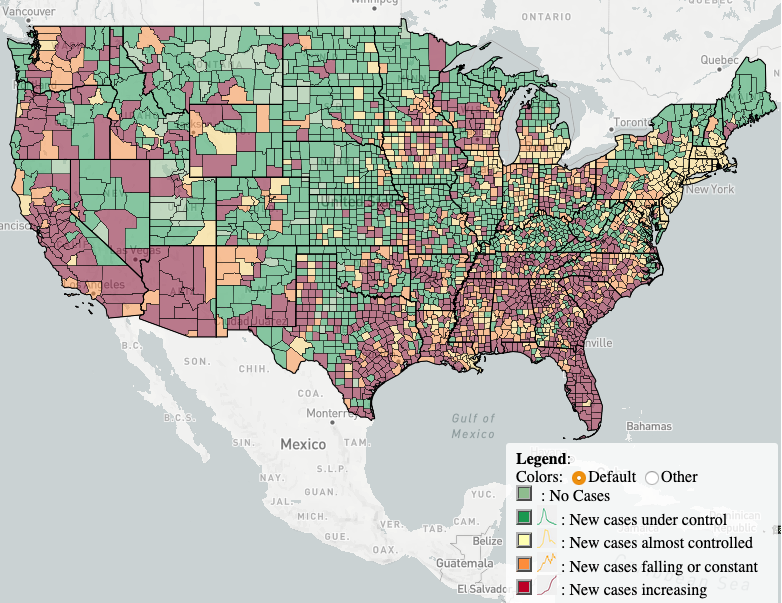